<a href="https://colab.research.google.com/github/DanielAngooGitHub/CIS-695---Comprehensive-Project-In-Computer-Information-Systems/blob/main/Calbank_Customer_Onboarding_Application_Daniel_Angoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

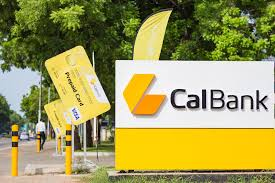***Calbank Data Collection Tool-Python***

**OBJECTIVE**



The objective of the project involves the development of a dedicated onboarding smartphone application for CalBank, a commercial bank in Ghana, aimed at streamlining the account opening process. The application is designed to expedite the account creation process and provide enhanced convenience for the working population, who often face time constraints that prevent them from visiting traditional brick-and-mortar banking facilities. By facilitating remote account openings, the application is expected to boost CalBank's customer acquisition efforts and drive sales growth. It is particularly advantageous for individuals residing in remote areas or for the unbanked population in regions with limited access to physical banking branches. By addressing these accessibility challenges, the application not only broadens CalBank's reach but also underscores its commitment to promoting financial inclusion. Furthermore, the application will empower small businesses to serve as proxy representatives for CalBank in communities where the bank does not maintain a physical presence. These agents will provide a range of banking services, including account openings, deposits, and withdrawals. This approach not only enhances CalBank's operational coverage but also supports the development of community-based banking solutions, thereby making everyday banking transactions more accessible to both existing and prospective customers.



**BACKGROUND**

In today’s fast-paced digital environment, traditional banking methods are increasingly perceived as cumbersome and inefficient, particularly for the working population and individuals residing in remote areas. The problem is compounded in regions like Ghana, where access to brick-and-mortar banking facilities can be limited, leaving a significant portion of the population underserved. This challenge presents a critical barrier to financial inclusion, which is essential for economic development.

The proposed solution is research that would be embarked upon to compare and analyze multiple Web-Based KYC data collection methods for Calbank using Python, Google Forms, and Low-Code Solutions. I will leverage the knowledge and skills I have acquired from various courses in the Master of Science in Information Systems (MSIS) program. Through my academic training, I have gained expertise in software development, database management, and project management.

These disciplines have equipped me with the tools necessary to identify inefficiencies in the existing account opening process and conceptualize a streamlined digital solution and advise the management of the bank accordingly. The research will greatly reduce the time and effort required for new customers to establish a banking relationship with CalBank. By extending the bank’s reach to underserved populations, particularly those in remote areas, this solution enhances operational efficiency and aligns with broader goals of financial inclusion and accessibility.


**CURRENT SYSTEM**

The current system employed by CalBank for account opening is primarily based on traditional in-person processes conducted at physical branch locations. This method requires prospective customers to visit a branch, complete paper-based forms, and provide physical copies of identification and other necessary documents. The process is not only time-consuming but also relies heavily on manual data entry by bank staff, which increases the potential for human error and delays in processing and also high operational cost.

In [1]:
!pip install gradio pandas

import gradio as gr
import pandas as pd
import os
import csv
import shutil
from datetime import datetime
import re

# Introductory text
INTRO_TEXT = """
This is an onboarding solution for CalBank, a commercial bank in Ghana to help them with a seamless account opening process.
This will speed up the account opening process and offer convenience for the working class who are usually busy with work and do not have enough time to go to a mortar-and-brick banking hall to open an account.

This application is expected to increase sales and the number of new customers since it can be used to onboard new customers who are far removed from the city or the unbanked population who lives in areas where access to a brick-and-mortar banking hall is difficult to come by. By bridging this gap, the app does not only extend CalBank's reach but also reinforces its commitment to financial inclusion.
"""

# Folder setup for proof documents
BASE_PROOF_FOLDER = 'proofs'
PROOF_OF_ID_FOLDER = os.path.join(BASE_PROOF_FOLDER, "Proof of ID")
PROOF_OF_ADDRESS_FOLDER = os.path.join(BASE_PROOF_FOLDER, "Proof of Address")
PASSPORT_PICTURE_FOLDER = os.path.join(BASE_PROOF_FOLDER, "Passport Picture")

os.makedirs(PROOF_OF_ID_FOLDER, exist_ok=True)
os.makedirs(PROOF_OF_ADDRESS_FOLDER, exist_ok=True)
os.makedirs(PASSPORT_PICTURE_FOLDER, exist_ok=True)

CSV_FILE = 'Calbank_Customers_Data.csv'

# Initialize CSV file if not exists
if not os.path.exists(CSV_FILE):
    with open(CSV_FILE, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([
            "Name", "Mother's Maiden Name", "Date of Birth", "Address", "Phone", "Email", "ID Type", "ID Number",
            "Account Type", "Proof of ID Path", "Proof of Address Path", "Passport Picture Path", "Employment Status",
            "Employer", "Accepted Terms", "Initials"
        ])

def calculate_age(dob):
    """Calculate age from date of birth."""
    today = datetime.today()
    birth_date = datetime.strptime(dob, "%Y-%m-%d")
    return today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))

def is_valid_email(email):
    """Validate email address to include only @gmail, @yahoo, and .edu domains."""
    allowed_domains = {"@gmail.com", "@yahoo.com", ".edu"}
    # Check if email ends with one of the allowed domains
    if any(email.endswith(domain) for domain in allowed_domains):
        return True
    return False

def is_valid_phone(phone):
    """Validate phone number."""
    pattern = r"^\d{10}$"
    return bool(re.match(pattern, phone))

def is_email_or_phone_unique(email, phone):
    """Check if email or phone is already used."""
    if not os.path.exists(CSV_FILE):
        return True
    with open(CSV_FILE, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row['Email'] == email or row['Phone'] == phone:
                return False
    return True

def save_to_csv(data):
    """Save customer data to CSV."""
    with open(CSV_FILE, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(data)

# File upload handler
def save_uploaded_file(uploaded_file, folder):
    """Save uploaded file to specified folder."""
    file_path = os.path.join(folder, os.path.basename(uploaded_file))
    shutil.copy(uploaded_file, file_path)
    return file_path

# Data submission function
def collect_data(full_name, mothers_maiden_name, dob, address, phone, email, id_type, id_number, account_type,
                 proof_of_id, proof_of_address, passport_picture, employment_status, employer, accept_terms,
                 initials):
    try:
        # Validate date of birth and age
        age = calculate_age(dob)
        if age < 18:
            return "Error: Customer must be at least 18 years old."

        # Validate phone number
        if not is_valid_phone(phone):
            return "Error: Phone number must be exactly 10 digits."

        # Validate email
        if not is_valid_email(email):
            return "Error: Invalid email address. Only @gmail.com, @yahoo.com, or .edu domains are allowed."

        # Validate uniqueness of email and phone
        if not is_email_or_phone_unique(email, phone):
            return "Error: Email or phone number is already in use."

        # Validate terms acceptance
        if not accept_terms:
            return "Error: You must accept the terms and conditions."

        # Save uploaded files
        proof_of_id_path = save_uploaded_file(proof_of_id, PROOF_OF_ID_FOLDER)
        proof_of_address_path = save_uploaded_file(proof_of_address, PROOF_OF_ADDRESS_FOLDER)
        passport_picture_path = save_uploaded_file(passport_picture, PASSPORT_PICTURE_FOLDER)

        # Save data to CSV
        save_to_csv([
            full_name, mothers_maiden_name, dob, address, phone, email, id_type, id_number, account_type,
            proof_of_id_path, proof_of_address_path, passport_picture_path, employment_status,
            employer, accept_terms, initials
        ])

        return "Data submitted successfully!"
    except Exception as e:
        return f"Error: {str(e)}"

# Gradio Interface
iface = gr.Interface(
    fn=collect_data,
    inputs=[
        gr.Textbox(label="Full Name"),  # Full Name
        gr.Textbox(label="Mother's Maiden Name"),  # Mother's Maiden Name
        gr.Textbox(label="Date of Birth (YYYY-MM-DD)"),  # Date of Birth
        gr.Textbox(label="Address"),  # Address
        gr.Textbox(label="Phone Number"),  # Phone Number
        gr.Textbox(label="Email"),  # Email
        gr.Dropdown(["Passport", "Driver's License", "National ID"], label="ID Type"),  # ID Type
        gr.Textbox(label="ID Number"),  # ID Number
        gr.Dropdown(["Savings", "Checkings", "Student"], label="Account Type"),  # Account Type
        gr.File(label="Proof of ID (.png, .jpeg, .jpg)", type="filepath"),  # Proof of ID
        gr.File(label="Proof of Address (.png, .jpeg, .jpg)", type="filepath"),  # Proof of Address
        gr.File(label="Passport Picture (.png, .jpeg, .jpg)", type="filepath"),  # Passport Picture
        gr.Radio(["Employed", "Self-employed", "Unemployed"], label="Employment Status"),  # Employment Status
        gr.Textbox(label="Employer"),  # Employer
        gr.Checkbox(label="I accept the terms and conditions"),  # Terms and Conditions
        gr.Textbox(label="Initials (as Signature)")  # Initials
    ],
    outputs="text",
    title="CalBank Know Your Customer (KYC) Onboarding Application",
    description=INTRO_TEXT
)

iface.launch(share=True, inline=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b3ca4fbc9c07e358b1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the w